In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

data = pd.read_csv('/Users/alket/desktop/dati/new_data_backfill_forwfill.csv', index_col = 0)
data

/Users/alket/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,cell_num,nr_people,hours,minutes
0,2017-04-16,486-1252,36.0,0.0,0.0
221,2017-04-16,486-1252,36.0,0.0,15.0
442,2017-04-16,486-1252,34.0,0.0,30.0
663,2017-04-16,486-1252,33.0,0.0,45.0
884,2017-04-16,486-1252,32.0,1.0,0.0
...,...,...,...,...,...
2608683,2017-08-16,498-1268,32.0,22.0,45.0
2608904,2017-08-16,498-1268,32.0,23.0,0.0
2609125,2017-08-16,498-1268,32.0,23.0,15.0
2609346,2017-08-16,498-1268,32.0,23.0,30.0


### Aggregazione dati e visualizzazione

In [3]:
# aggrega per numero cella
agg_by_cell = data.groupby(by = data['cell_num'])
print(len(agg_by_cell))

agg_by_date_cell = data.groupby(['date', 'cell_num'])
print(len(agg_by_date_cell))

#agg_by_date_cell_hour = data.groupby(['date', 'cell_num', 'hours'])
#print(len(agg_by_date_cell_hour))

221
27183


486-1252


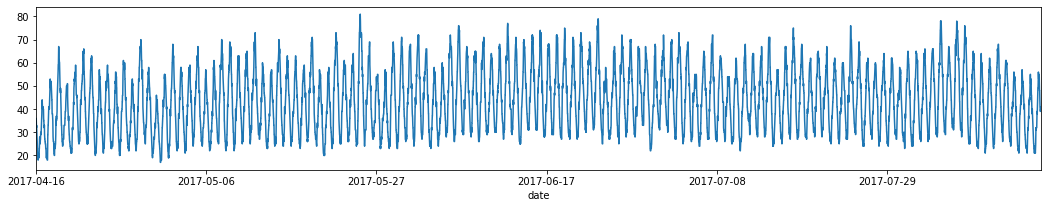

486-1253


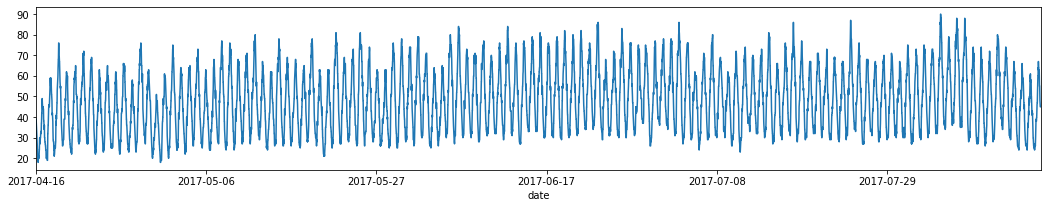

486-1254


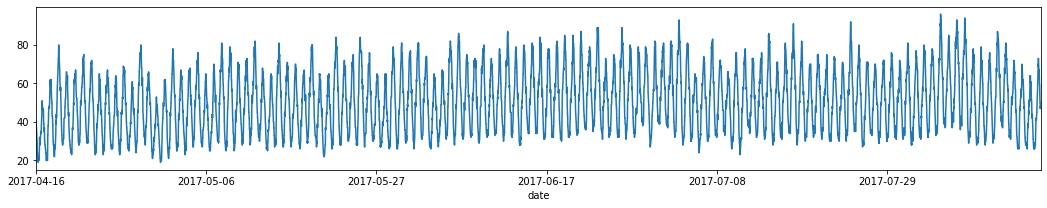

486-1255


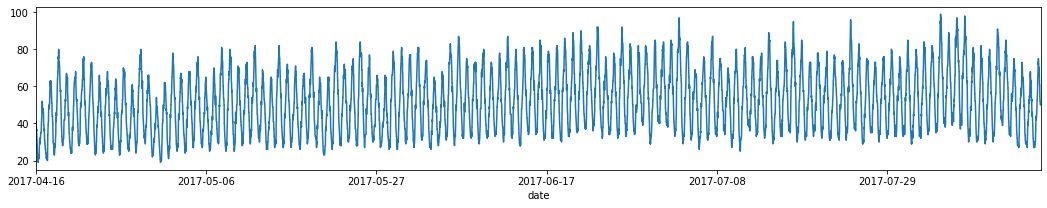

In [4]:
count = 0
for i, k in agg_by_cell:
    print(i)
    plt.figure(figsize = (18, 3))
    k.set_index(["date"], inplace = True, drop = True)
    k['nr_people'].plot()
    plt.show()
    count +=1
    if count > 3: break
        

## Celle con diversi profili. 

<p>
Osservando le celle si possono distingure diverse tipologie di celle anche in base al traffico dati che le interessa.     
</p>    

#### Celle con andamento abbastanza stabile e periodico

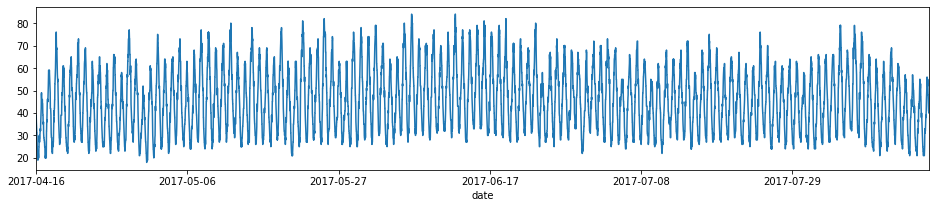

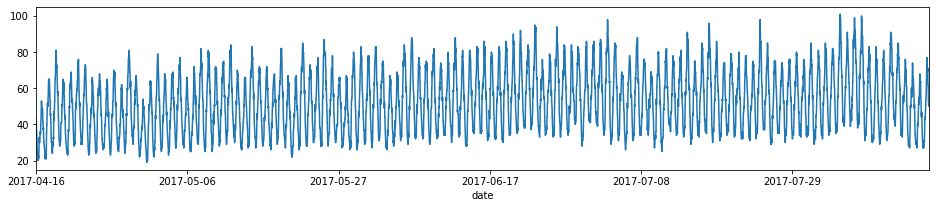

In [5]:
constant_cell = agg_by_cell.get_group('487-1252')
chaotic_cell = agg_by_cell.get_group('495-1266')
cell3 = agg_by_cell.get_group('487-1253')
frames = [constant_cell, cell3]
for i in frames:
    plt.figure(figsize = (16,3))
    i.set_index(["date"], inplace = True, drop = True)
    i['nr_people'].plot()
    plt.show()

####  Celle con andamento irregolare   - 1

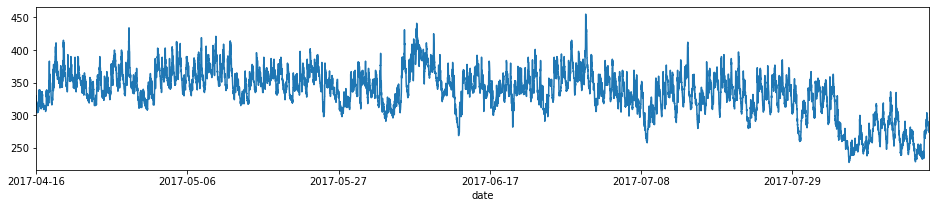

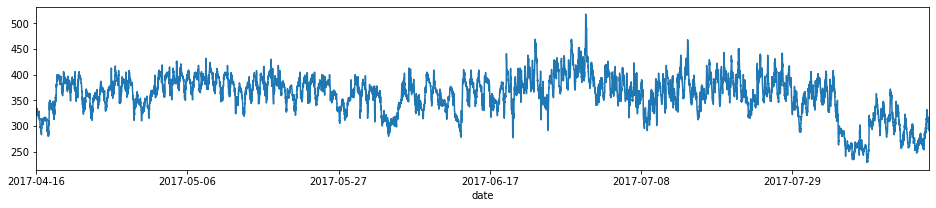

In [6]:
chaotic_cell = agg_by_cell.get_group('495-1266')
cell3 = agg_by_cell.get_group('495-1267')
frames = [chaotic_cell, cell3]
for i in frames:
    plt.figure(figsize = (16,3))
    i.set_index(["date"], inplace = True, drop = True)
    i['nr_people'].plot()
    plt.show()

#### Celle dove il traffico fa un salto per un periodo 

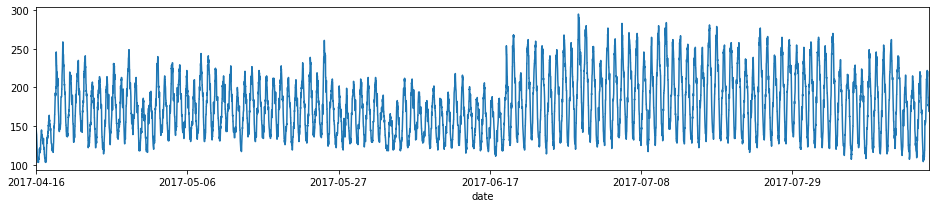

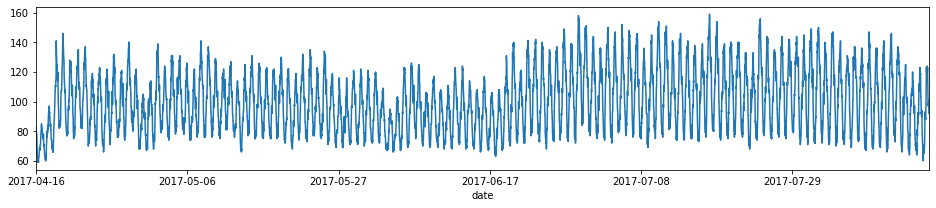

In [7]:
cell2 = agg_by_cell.get_group('489-1265')
cell3 = agg_by_cell.get_group('489-1264')
frames = [cell2, cell3]
for i in frames:
    plt.figure(figsize = (16,3))
    i.set_index(["date"], inplace = True, drop = True)
    i['nr_people'].plot()
    plt.show()

#### Celle dove si nota bene il pattern giorni lavorativi - giorni weekend

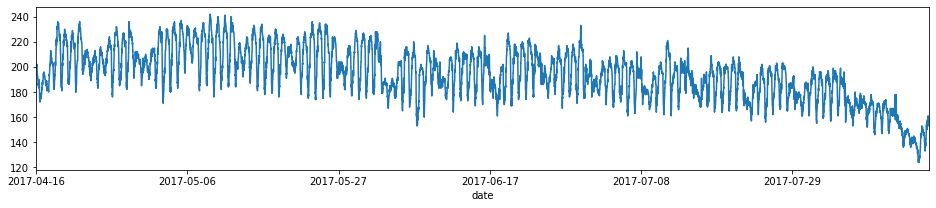

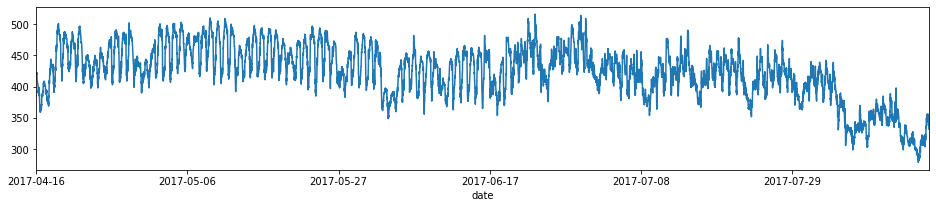

In [8]:
weekend_weekday = agg_by_cell.get_group('493-1268')
cell3 = agg_by_cell.get_group('494-1268')
cell3.to_csv('cell2.csv')
frames = [weekend_weekday, cell3]
for i in frames:
    plt.figure(figsize = (16,3))
    i.set_index(["date"], inplace = True, drop = True)
    i['nr_people'].plot()
    plt.show()

#### Celle con eventi (o picchi) di uno o anche di più giorni 

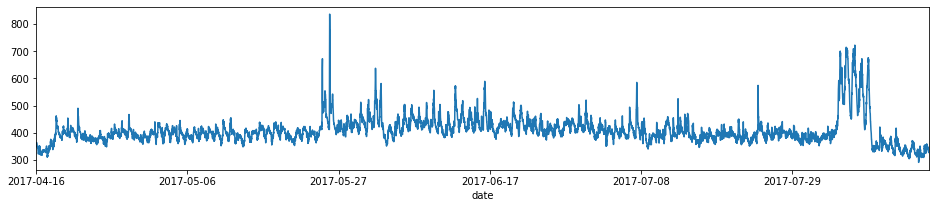

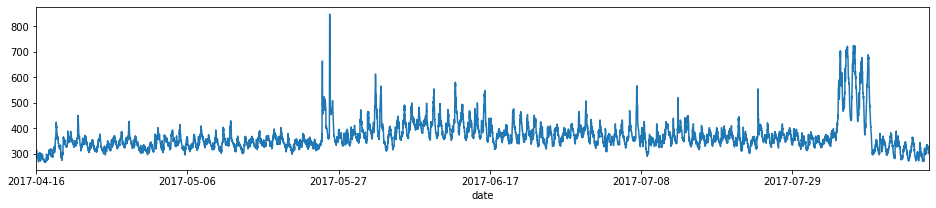

In [11]:
events = agg_by_cell.get_group('496-1255')
cell3 = agg_by_cell.get_group('496-1256')
frames = [events, cell3]
for i in frames:
    plt.figure(figsize = (16,3))
    i.set_index(["date"], inplace = True, drop = True)
    i['nr_people'].plot()
    plt.show()

### Visualize all types of cells 

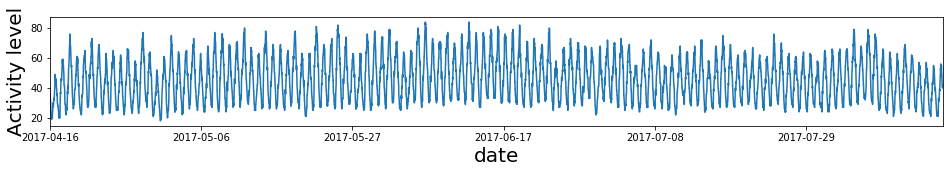

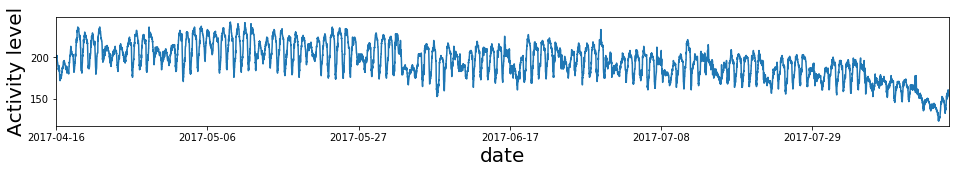

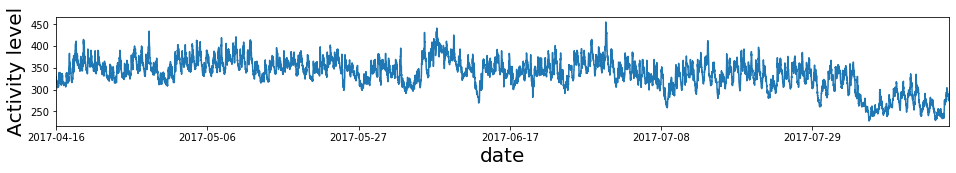

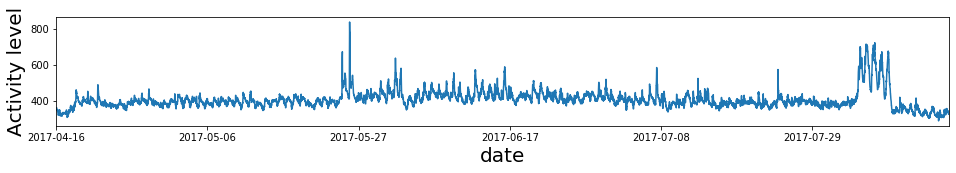

In [35]:
events = agg_by_cell.get_group('496-1255')
weekend_weekday = agg_by_cell.get_group('493-1268')
constant_cell = agg_by_cell.get_group('487-1252')
chaotic_cell = agg_by_cell.get_group('495-1266')

frames2 = [constant_cell, weekend_weekday, chaotic_cell, events ]

for i in frames2:
    plt.figure(figsize = (16,2))
    i.set_index(["date"], inplace = True, drop = True)
    plt.xlabel('Observations in time', fontsize=20)
    plt.ylabel('Activity level', fontsize=20)
    i['nr_people'].plot(label="plot A")
    plt.show()

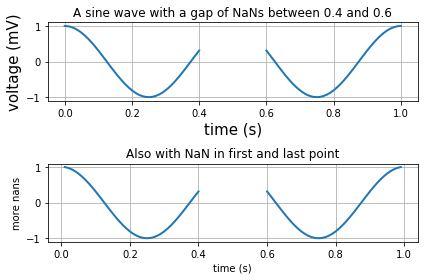

In [31]:
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(2 * 2*np.pi * t)
t[41:60] = np.nan

plt.subplot(2, 1, 1)
plt.plot(t, s, '-', lw=2)

plt.xlabel('time (s)', fontsize=15)
plt.ylabel('voltage (mV)', fontsize=15)
plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
plt.grid(True)

plt.subplot(2, 1, 2)
t[0] = np.nan
t[-1] = np.nan
plt.plot(t, s, '-', lw=2)
plt.title('Also with NaN in first and last point')

plt.xlabel('time (s)')
plt.ylabel('more nans')
plt.grid(True)

plt.tight_layout()
plt.show()